In [1]:
import PIL.Image as pil_image
import io
import numpy as np
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os

from ct_utils import ctload, ctshow, ctsave

In [2]:
DATASET_DIR = "COVID-CTset"

# Data Exploration 

## Explore the different scans' sizes

In [3]:
from collections import Counter
dir_names = []
dir_names_normal = []

for root, dirnames, filenames in os.walk(DATASET_DIR):
    for filename in filenames:
        full_path = os.path.dirname(os.path.join(root, filename))
        dir_names.append(full_path)
        if 'normal' in full_path:
            dir_names_normal.append(full_path)

In [4]:
img_per_scan_counter = Counter(dir_names)
lengths_counter = Counter(dict(img_per_scan_counter).values())
print(len(img_per_scan_counter))
print(lengths_counter[35])

1349
693


In [5]:
img_per_scan_counter = Counter(dir_names_normal)
lengths_counter = Counter(dict(img_per_scan_counter).values())
print(len(img_per_scan_counter))
print(lengths_counter[35])
# dir_names_normal

1068
546


## Utilize their chooser

In [27]:
# Work only with 35-slices scans
wanted_scans_dirs = [scan_dir for scan_dir in img_per_scan_counter if img_per_scan_counter[scan_dir] == 35]
wanted_scans_dirs[:10]

['COVID-CTset/normal6/patient173/SR_3',
 'COVID-CTset/normal6/patient173/SR_4',
 'COVID-CTset/normal6/patient381/SR_3',
 'COVID-CTset/normal6/patient381/SR_4',
 'COVID-CTset/normal6/patient406/SR_3',
 'COVID-CTset/normal6/patient406/SR_4',
 'COVID-CTset/normal6/patient380/SR_3',
 'COVID-CTset/normal6/patient380/SR_4',
 'COVID-CTset/normal6/patient404/SR_3',
 'COVID-CTset/normal6/patient404/SR_4']

## Choose mask size

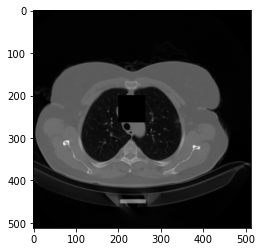

In [24]:
from copy import deepcopy
sample_path=r"covid_data/patient1/SR_3/IM00010.tif"
# img = ctload(sample_path)
# masked = deepcopy(img)
with open(sample_path, 'rb') as f:
    tif = pil_image.open(io.BytesIO(f.read()))
masked=np.array(tif)
masked[200:264, 200:264] = 1
ctshow(masked)

## Chose 64 * 64 * 3 